In [2]:
#Date of last revision: 07/01/2022
#This code reads in SS data to calculate locaton of eddies and finds the mean values of different variables within the eddies
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import datetime as dt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
import numpy.ma as ma
import glob
import os
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations

In [35]:
#take satelite files pats, sort them and load them into list
sat_files = sorted(glob.glob('/data/watkinson/Summer2022/data/cafe/1day_regrid/*.nc'))

print(len(sat_files))
#take anticyclonic eddy files paths, sort them and load them into list
#anti_files = sorted(glob.glob('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_2004*.nc'))
anti_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Anticyclonic/Anti*.nc'))

#take cyclonic eddy files paths, sort them and load them into list
#cycl_files = sorted(glob.glob('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_2004*.nc'))
cycl_files = sorted(glob.glob('/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/Cyclonic/Cyclonic_2004*.nc'))

cycl_chlor_max = list()#empty list to load cyclonic eddy chlorophyll mean vlaues into throghout loop below
anti_chlor_max = list()#empty list to load anticyclonic eddy chlorophyll mean values into throghout loop below

cycl_chlor_min = list()#empty list to load cyclonic eddy chlorophyll mean vlaues into throghout loop below
anti_chlor_min = list()

n=0 #set n to 0 so the loop starts with first file in list
while n < len(anti_files): #once finalized, put this inside a funciton so you can calcualte the mean for multiple variables
    #Load in data
    a = EddiesObservations.load_file(anti_files[n])#anticyclonic eddy data
    c = EddiesObservations.load_file(cycl_files[n])#cyclonic eddy data
    sat_data = RegularGridDataset((sat_files[n]),"lon","lat",nan_masking=False)#satellite data
    
    #this interpolates the satellite data grid onto the contours of the eddy data and uses mean function to calcualte values inside these contours
        #can also do this method for: ‘center’, ‘mean’, ‘max’, ‘min’, ‘nearest’ 
    anti_chlor = a.interp_grid(sat_data, "chlor_a", method="mean", intern=False)#this interpolates the sa
    cycl_chlor = c.interp_grid(sat_data, "chlor_a", method="mean", intern=False)
    
   # anti_chlor_m = a.interp_grid(sat_data, "chlor_a", method="min", intern=False)#this interpolates the sa
    #cycl_chlor_m = c.interp_grid(sat_data, "chlor_a", method="min", intern=False)
    #append the result for each file loop to the variables below
    anti_chlor_max = np.concatenate([anti_chlor_max,anti_chlor])
    cycl_chlor_max = np.concatenate([cycl_chlor_max,cycl_chlor])
    
    #anti_chlor_min = np.concatenate([anti_chlor_min,anti_chlor_m])
    #cycl_chlor_min = np.concatenate([cycl_chlor_min,cycl_chlor_m])
    #anti_chlor_mean.append(anti_chlor)
    #cycl_chlor_mean.append(cycl_chlor)
    
    n=n+1


We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004001.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004002.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004003.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004004.L4_gom_day_CAFE.nc


366


We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004005.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004006.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004007.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004008.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004009.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004010.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004011.L4_gom_day_CAFE.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/1day_regrid/A2004012.L4_gom_day_

In [36]:
print("# of Anticyclonic Eddies in 2004:", np.size(anti_chlor_max))
print("# of Anticyclonic Eddies filled with nan:",np.count_nonzero(np.isnan(anti_chlor_max)))
M = anti_chlor_max[~np.isnan(anti_chlor_max)]

print("# of Anticyclonic Eddies that have a value:", np.size(M))
print("Index of Anticyclonic Eddies that have data:",np.where(anti_chlor_max>0))
print("# of Cyclonic Eddies in 2004:", np.size(cycl_chlor_max))
print("# of Cyclonic Eddies filled with nan:",np.count_nonzero(np.isnan(cycl_chlor_max)))
N = cycl_chlor_max[~np.isnan(cycl_chlor_max)]
print("# of Cyclonic Eddies that have a value:", np.size(N))
print("Index of Cyclonic Eddies that have data:",np.where(cycl_chlor_max>0))
average_daily_anti = len(anti_chlor_max)/366
average_daily_cycl = len(cycl_chlor_max)/366
print("Average Number of Cyclonic Eddies per day:",average_daily_cycl)
print("Average Number of Antiyclonic Eddies per day:",average_daily_anti)

# of Anticyclonic Eddies in 2004: 2559
# of Anticyclonic Eddies filled with nan: 2535
# of Anticyclonic Eddies that have a value: 24
Index of Anticyclonic Eddies that have data: (array([ 146,  148,  164,  233,  241,  263,  265,  436,  483,  540,  555,
        631, 1033, 1585, 1815, 2019, 2021, 2023, 2024, 2152, 2422, 2425,
       2427, 2523]),)
# of Cyclonic Eddies in 2004: 2780
# of Cyclonic Eddies filled with nan: 2756
# of Cyclonic Eddies that have a value: 24
Index of Cyclonic Eddies that have data: (array([  80,  154,  159,  218,  295,  328,  459,  518,  533,  535,  542,
        572,  658,  679,  687,  763, 1640, 2125, 2133, 2166, 2170, 2381,
       2443, 2630]),)
Average Number of Cyclonic Eddies per day: 7.595628415300546
Average Number of Antiyclonic Eddies per day: 6.991803278688525


In [20]:
dir = '/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/'
import pandas as pd
cycl_eddies = pd.read_pickle(dir + "Cyclonic_eddies_2004.pkl")
cycl_eddies = cycl_eddies.droplevel(0)
cycl_eddies = cycl_eddies.reset_index(drop=True)
cycl_eddies = cycl_eddies.iloc[:,[1,22]]
cycl_eddies
#cycl_eddies.time

,effective_area,time
0,4.244626e+09,2004-01-01
1,4.244626e+09,2004-01-01
2,4.244626e+09,2004-01-01
3,4.244626e+09,2004-01-01
4,4.244626e+09,2004-01-01
...,...,...
138995,6.733729e+09,2004-12-31
138996,6.733729e+09,2004-12-31
138997,6.733729e+09,2004-12-31
138998,6.733729e+09,2004-12-31


In [30]:
#dir = '/data/watkinson/Spring2022/Satellite/data/eddies/'
dir = '/data/watkinson/Fall2022/Eddy_data/GoM_tuned_eddies/'
import pandas as pd
cycl_eddies = pd.read_pickle(dir + "Cyclonic_eddies_2004.pkl")
#cycl_eddies = cycl_eddies.droplevel(0)
cycl_eddies = cycl_eddies.iloc[6::50,:]
#cycl_eddies = anti_eddies.iloc[:,[1,18]]#selecting amplitude and time from the ds dataframe, for original eddies
cycl_eddies = cycl_eddies.iloc[:,[1,22]]#selecting amplitude and time from the ds dataframe
cycl_eddies = cycl_eddies.reset_index(drop=True)#drop previous method of indexing and reset
cycl_eddies['time']=pd.to_datetime(cycl_eddies['time'])#convert entire "Dates" Column to datetime format this time 
cycl_eddies.index=cycl_eddies['time']#replace index with entire "Dates" Column to work with groupby function
cycl_eddies = cycl_eddies.iloc[:,[0]]#simplify dataframe to just time index and amplitude
#cycl_eddies = cycl_eddies["2004-01-01":"2004-12-31"]
cycl_eddies['cycl_chlor_max']=cycl_chlor_max
cycl_eddies['cycl_chlor_min']=cycl_chlor_min
cycl_eddies.replace([np.inf,-np.inf],np.nan,inplace=True)
cycl_eddies.dropna(inplace=True)

#print(cycl_eddies)
cycl_chlor_mean_min = cycl_eddies.cycl_chlor_min.resample('D').mean()
cycl_chlor_mean_max = cycl_eddies.cycl_chlor_max.resample('D').mean()
#cycl_chlor_mean_min = cycl_eddies.cycl_chlor_min.resample('M').mean()
#cycl_chlor_mean_max = cycl_eddies.cycl_chlor_max.resample('M').mean()

anti_eddies = pd.read_pickle(dir + "Anticyclonic_eddies_2004.pkl")
#anti_eddies = anti_eddies.droplevel(0)
anti_eddies = anti_eddies.iloc[6::50,:]
#anti_eddies = anti_eddies.iloc[:,[1,18]]#selecting amplitude(0) and time from the ds dataframe 12=speed for original eddies
anti_eddies = anti_eddies.iloc[:,[1,22]]
anti_eddies = anti_eddies.reset_index(drop=True)#drop previous method of indexing and reset
anti_eddies['time']=pd.to_datetime(anti_eddies['time'])#convert entire "Dates" Column to datetime format this time 
anti_eddies.index=anti_eddies['time']#replace index with entire "Dates" Column to work with groupby function
anti_eddies = anti_eddies.iloc[:,[0]]#simplify dataframe to just time index and amplitude
#anti_eddies = anti_eddies["2004-01-01":"2004-12-31"]
anti_eddies['anti_chlor_max']=anti_chlor_max
anti_eddies['anti_chlor_min']=anti_chlor_min
anti_eddies.replace([np.inf,-np.inf],np.nan,inplace=True)
anti_eddies.dropna(inplace=True)
#print(anti_eddies)
anti_chlor_mean_min = anti_eddies.anti_chlor_min.resample('D').mean()
anti_chlor_mean_max = anti_eddies.anti_chlor_max.resample('D').mean()
#anti_chlor_mean_min = anti_eddies.anti_chlor_min.resample('M').mean()
#anti_chlor_mean_max = anti_eddies.anti_chlor_max.resample('M').mean()
#anti_chlor_mean_max.describe()
print(anti_chlor_mean_min)

time
2004-01-01    0.159350
2004-01-02    0.143522
2004-01-03    0.154398
2004-01-04    0.138177
2004-01-05    0.148003
                ...   
2004-12-27    0.177517
2004-12-28    0.155283
2004-12-29    0.226679
2004-12-30    0.212049
2004-12-31    0.237726
Freq: D, Name: anti_chlor_min, Length: 366, dtype: float64


In [31]:

print("Daily-averaged Maximum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_max.describe())
print("Daily-averaged Minimum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_min.describe())
print("Daily-averaged Maximum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_max.describe())
print("Daily-averaged Minimum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_min.describe())
'''
print("Monthly-averaged Maximum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_max.describe())
print("Monthly-averaged Minimum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_min.describe())
print("Monthly-averaged Maximum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_max.describe())
print("Monthly-averaged Minimum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_min.describe())
'''

Daily-averaged Maximum Chlorophyll inside Anticyclonic Eddy Statistical Summary:
 count    356.000000
mean       0.317332
std        0.513982
min        0.054183
25%        0.122521
50%        0.184903
75%        0.289397
max        5.035322
Name: anti_chlor_max, dtype: float64
Daily-averaged Minimum Chlorophyll inside Anticyclonic Eddy Statistical Summary:
 count    356.000000
mean       0.102070
std        0.051691
min        0.035424
25%        0.063355
50%        0.088543
75%        0.128026
max        0.378608
Name: anti_chlor_min, dtype: float64
Daily-averaged Maximum Chlorophyll inside Cyclonic Eddy Statistical Summary:
 count    353.000000
mean       0.453586
std        0.802402
min        0.054950
25%        0.165999
50%        0.257065
75%        0.410245
max       11.360631
Name: cycl_chlor_max, dtype: float64
Daily-averaged Minimum Chlorophyll inside Cyclonic Eddy Statistical Summary:
 count    353.000000
mean       0.121524
std        0.054673
min        0.047569
25%      

'\nprint("Monthly-averaged Maximum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_max.describe())\nprint("Monthly-averaged Minimum Chlorophyll inside Anticyclonic Eddy Statistical Summary:\n",anti_chlor_mean_min.describe())\nprint("Monthly-averaged Maximum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_max.describe())\nprint("Monthly-averaged Minimum Chlorophyll inside Cyclonic Eddy Statistical Summary:\n",cycl_chlor_mean_min.describe())\n'

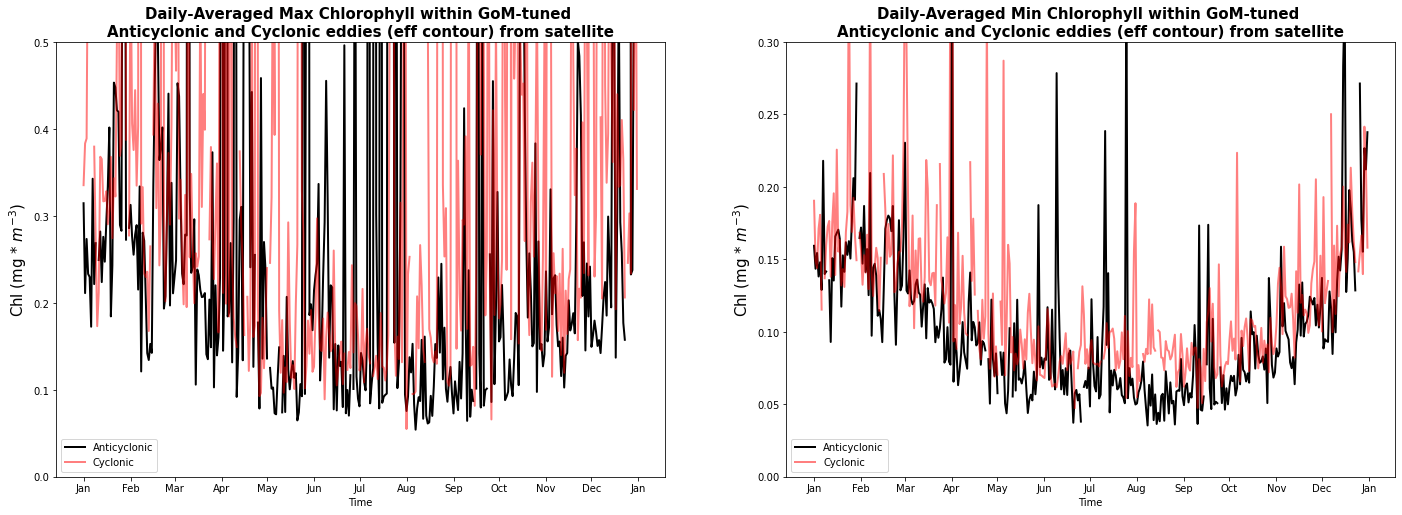

In [34]:
start = dt.datetime(2004,1,1)
new_dates = [start + dt.timedelta(days=i) for i in range(366)]

#print(new_dates)

x = new_dates
#x=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
import matplotlib.dates as mdates
#xfmt_major=mdates.DateFormatter('\n\n%Y')
#xfmt_minor=mdates.DateFormatter('%b')
xfmt_major=mdates.DateFormatter('%b')
xfmt_minor=mdates.DateFormatter('%d')
months=mdates.MonthLocator()
#years=mdates.YearLocator()
days=mdates.DayLocator(interval=15)
#fig = plt.figure(figsize=(12, 8), dpi=80)
#ax = fig.add_axes([.03,.03,.8,.8])
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(24,8))
#ax1.set_title('Average Small Zooplankton Biomass within \nAnticyclonic eddies from model',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Average Small Zooplankton Biomass within \nCyclonic eddies from model',loc='center',fontsize=15,fontweight='bold')
#ax1.set_title('Max and Min Chlorphyll within \nAnticyclonic eddies from  satellite',loc='center',fontsize=15,fontweight='bold')
#ax2.set_title('Max and Min Chlorphyll within \nCyclonic eddies from satellite',loc='center',fontsize=15,fontweight='bold')
ax1.set_title('Daily-Averaged Max Chlorophyll within GoM-tuned \nAnticyclonic and Cyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
ax2.set_title('Daily-Averaged Min Chlorophyll within GoM-tuned \nAnticyclonic and Cyclonic eddies (eff contour) from satellite',loc='center',fontsize=15,fontweight='bold')
ax1.set_ylim(0,.5)
ax2.set_ylim(0,.3)
#plt.title('Average Small Zooplankton Biomass within eddies from model',loc='center',fontsize=15,fontweight='bold')#,y=1.03)
ax1.plot(x,anti_chlor_mean_max,label='Anticyclonic',color='k',lw=2)
ax2.plot(x,anti_chlor_mean_min,label='Anticyclonic',color='k',lw=2)
ax1.plot(x,cycl_chlor_mean_max,label='Cyclonic',color='red',lw=2,alpha=.5)
ax2.plot(x,cycl_chlor_mean_min,label='Cyclonic',color='red',lw=2,alpha=.5)
ax1.xaxis.set_major_locator(months)
ax1.xaxis.set_major_formatter(xfmt_major)
#ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#ax1.xaxis.set_minor_locator(days)
#ax1.xaxis.set_minor_formatter(xfmt_minor)
'''
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(xfmt_major)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_minor_formatter(xfmt_minor)
'''
#plt.setp(ax1.xaxis.get_minorticklabels(), rotation=90)
ax1.set_xlabel('Time')
ax1.set_ylabel('Chl (mg * $m^{-3}$)',fontsize=15)
ax1.legend(loc='best')
ax2.xaxis.set_major_locator(months)
ax2.xaxis.set_major_formatter(xfmt_major)
#ax2.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#ax2.xaxis.set_minor_locator(days)
#ax2.xaxis.set_minor_formatter(xfmt_minor)
#plt.setp(ax2.xaxis.get_minorticklabels(), rotation=90)
ax2.set_xlabel('Time')
ax2.set_ylabel('Chl (mg * $m^{-3}$)',fontsize=15)
ax2.legend(loc='best')
plt.show()
